<a href="https://colab.research.google.com/github/cibelerusso/Aprendizado_de_Maquina/blob/main/Codigos%20em%20Python/AprendizadoSupervisionado_Perceptron_Funcoeslogicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SME0829 Aprendizado de Máquina


por **Cibele Russo**

**ICMC/USP - São Carlos SP**



## Exemplo: Perceptron para funções lógicas AND e OR

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Função de ativação (degrau)
def step_function(x):
    return 1 if x >= 0 else 0

# Função para treinar o perceptron 
def train_perceptron(X, y, learning_rate=0.1, epochs=100):
    num_features = X.shape[1]
    weights = np.zeros(num_features + 1)  # Inicialização dos pesos (incluindo o bias)
    
    for _ in range(epochs):
        for i in range(X.shape[0]):
            # Adiciona o valor de bias ao vetor de entrada
            x = np.insert(X[i], 0, 1)
            # Calcula a saída do perceptron
            output = step_function(np.dot(weights, x))
            # Atualiza os pesos
            weights += learning_rate * (y[i] - output) * x 
    return weights

# Função para testar o perceptron
def test_perceptron(X, weights):
    num_samples = X.shape[0]
    results = np.zeros(num_samples)
    
    for i in range(num_samples):
        x = np.insert(X[i], 0, 1)
        results[i] = step_function(np.dot(weights, x))
    return results


In [7]:
# Dados de treinamento
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1])
y_xor = np.array([0, 1, 1, 0])

# Treinamento do perceptron para a função AND
weights_and = train_perceptron(X_train, y_and)
print("Pesos treinados para AND:", weights_and)

# Treinamento do perceptron para a função OR
weights_or = train_perceptron(X_train, y_or)
print("Pesos treinados para OR:", weights_or)

# Dados de teste
X_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Teste do perceptron para a função AND
results_and = test_perceptron(X_test, weights_and)
print("\nResultado do perceptron para AND:", results_and)

# Teste do perceptron para a função OR
results_or = test_perceptron(X_test, weights_or)
print("Resultado do perceptron para OR:", results_or)



Pesos treinados para AND: [-0.2  0.2  0.1]
Pesos treinados para OR: [-0.1  0.1  0.1]

Resultado do perceptron para AND: [0. 0. 0. 1.]
Resultado do perceptron para OR: [0. 1. 1. 1.]


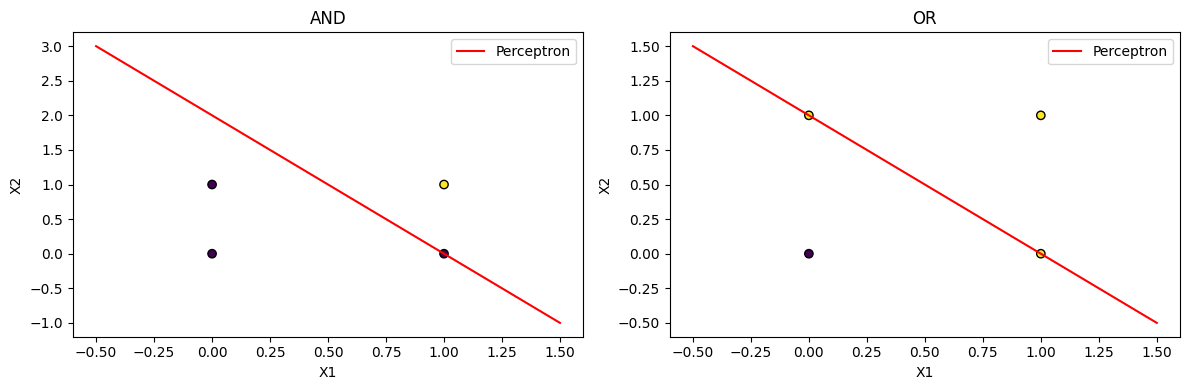

In [8]:

# Visualização dos conjuntos de dados com as retas ajustadas pelo perceptron
plt.figure(figsize=(12, 4))

# Função AND
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_and, cmap='viridis', edgecolors='k')
plt.title('AND')
plt.xlabel('X1')
plt.ylabel('X2')
x = np.linspace(-0.5, 1.5, 100)
y = (-weights_and[0] - weights_and[1] * x) / weights_and[2]
plt.plot(x, y, color='red', label='Perceptron')
plt.legend()

# Função OR
plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_or, cmap='viridis', edgecolors='k')
plt.title('OR')
plt.xlabel('X1')
plt.ylabel('X2')
x = np.linspace(-0.5, 1.5, 100)
y = (-weights_or[0] - weights_or[1] * x) / weights_or[2]
plt.plot(x, y, color='red', label='Perceptron')
plt.legend()


plt.tight_layout()
plt.show()
